# Linear Regrssion on California Housing Price

### Import packages and dataset

In [ ]:
# import libraries here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

# library for responsive graphs
import plotly.express as px

%matplotlib inline


In [ ]:
df = pd.read_csv("/housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# alternative way to fetch the data
# from sklearn.datasets import fetch_california_housing
# california_housing = fetch_california_housing(as_frame=True).frame
# california_housing.head()

In [ ]:
#df.describe()

In [ ]:
#Drop unnecessary attributes
df = df.drop(['latitude','longitude','households','ocean_proximity'], axis = 1)

In [ ]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,41.0,880.0,129.0,322.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,3.8462,342200.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [ ]:
#Any null values?
df.isna().sum()


housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
median_income           0
median_house_value      0
dtype: int64

Text(0, 0.5, 'Frequency')

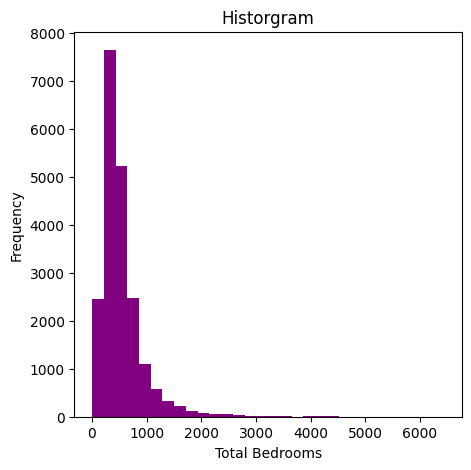

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(df[df["total_bedrooms"].notnull()]["total_bedrooms"],bins=30,color="purple")
#histogram of totalbedrooms
#data has some outliers..??
#(df["total_bedrooms"]>4000).sum()
plt.title("Historgram")
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")

In [ ]:
#df.boxplot(by ='median_house_value', column =['total_bedrooms'], grid = False)

<ipython-input-80-610e0c9e3a55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="total_bedrooms",data=df, orient="h", palette="plasma")


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

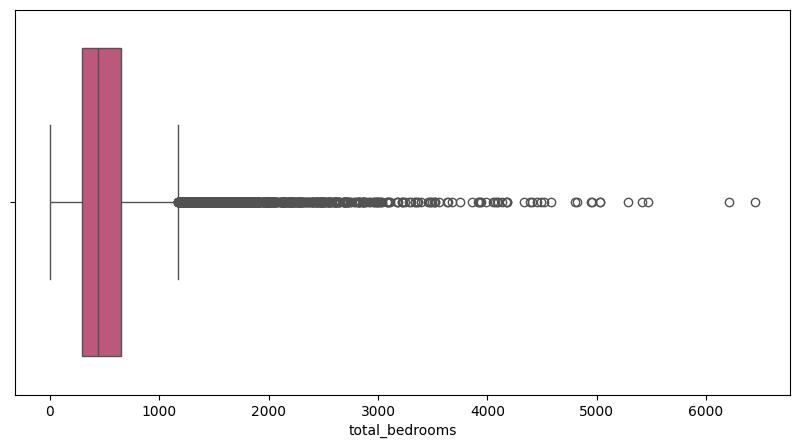

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="total_bedrooms",data=df, orient="h", palette="plasma")
plt.plot

In [ ]:
#fill 207 null values with the column median as thee are many outliers
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
df.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.shape

(20640, 7)

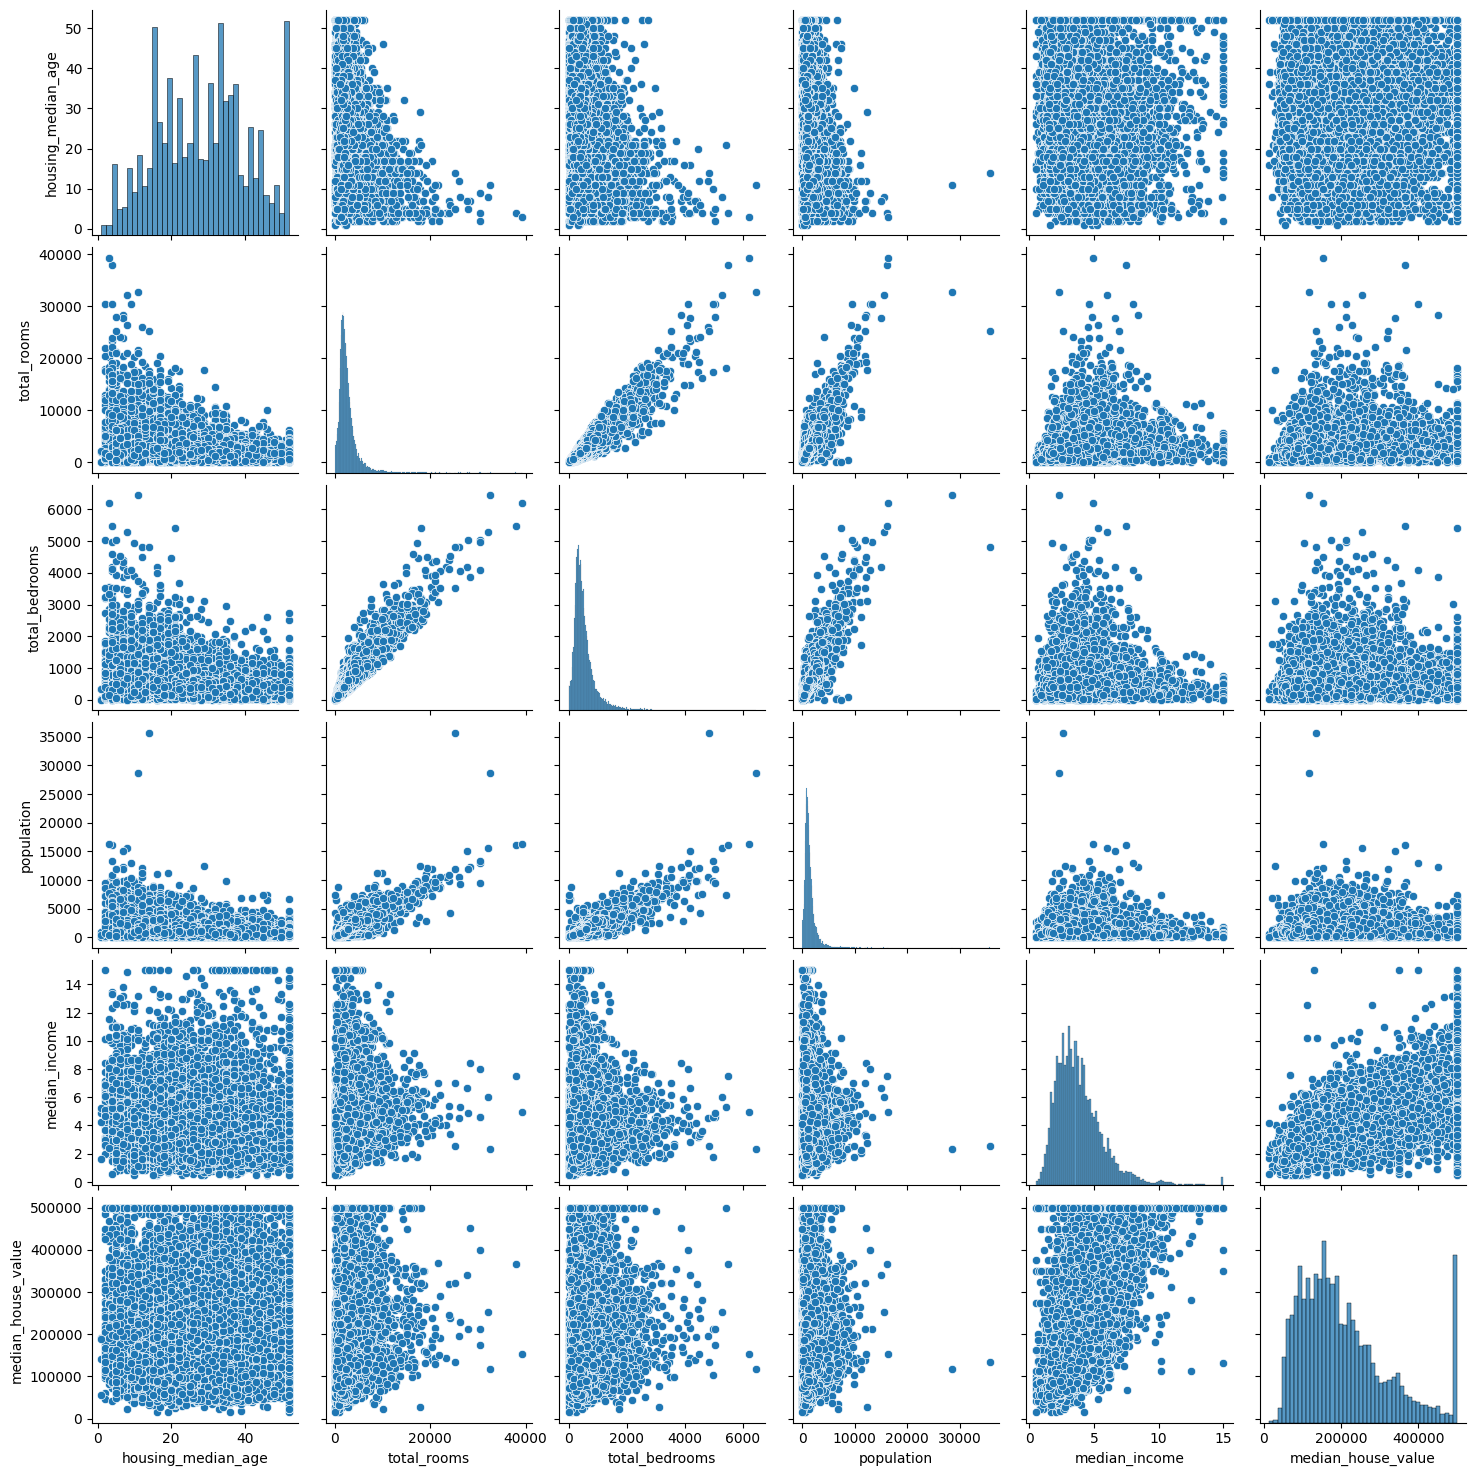

In [ ]:
sns.pairplot(df)

<Axes: >

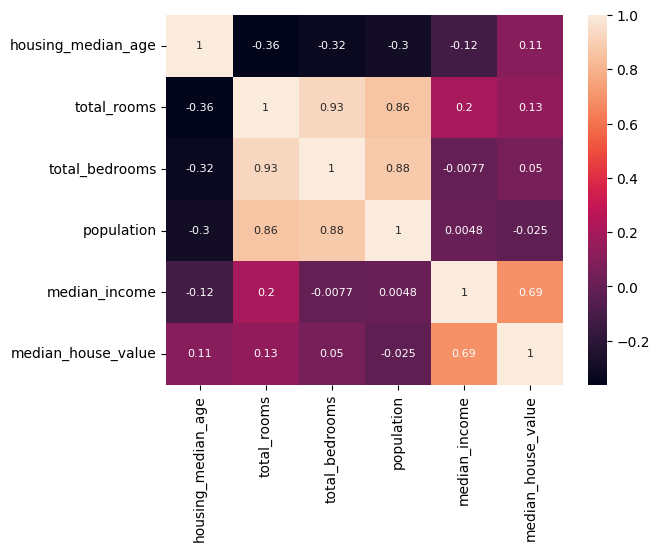

In [ ]:
corr_matrix = df.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

In [ ]:
corr['median_house_value'].sort_values(ascending=True)

population           -0.024650
total_bedrooms        0.049686
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
df.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
#Normalize X and y
column1 = "median_income"
column2 = "median_house_value"
df[column1] = (df[column1] - df[column1].min()) / (df[column1].max() - df[column1].min())
df[column2] = (df[column2] - df[column2].min()) / (df[column2].max() - df[column2].min())

In [ ]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
0,41.0,880.0,129.0,322.0,0.539668,0.902266
1,21.0,7099.0,1106.0,2401.0,0.538027,0.708247
2,52.0,1467.0,190.0,496.0,0.466028,0.695051
3,52.0,1274.0,235.0,558.0,0.354699,0.672783
4,52.0,1627.0,280.0,565.0,0.230776,0.674638


In [ ]:
#Split the dataset for testing and training
X = df['median_income']
y = df.iloc[:,-1]
#y2 = df['median_house_value'] #same result as the previous command
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

0    0.539668
1    0.538027
2    0.466028
3    0.354699
4    0.230776
Name: median_income, dtype: float64

In [ ]:
y.head()

0    0.902266
1    0.708247
2    0.695051
3    0.672783
4    0.674638
Name: median_house_value, dtype: float64

In [ ]:
#y2.head()

<img src = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*BDnev89iHmFqbB-HY1MuRQ.png">

In [ ]:
num = np.sum((X_train - X_train.mean()) * (y_train - y_train.mean()))
denom = np.sum((X_train - X_train.mean()) ** 2)

b1 = num/denom
b0 = y_train.mean() - (b1 * X_train.mean())


print(b1, b0)

1.2537045269507405 0.10396546917547927


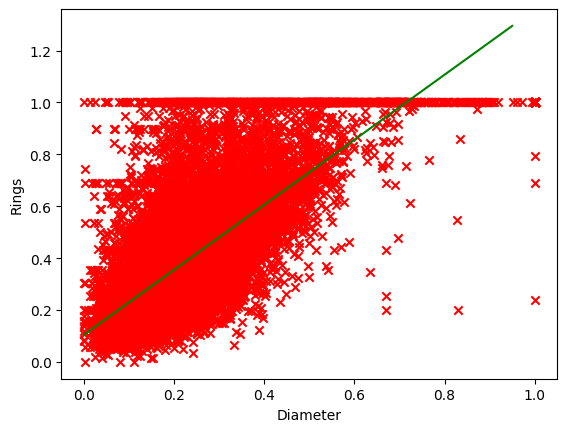

In [ ]:
#Plot a scatter plot of (x,y) and also plot the regression line
x = np.arange(0, 1, 0.05)
y_pred = b1 * x + b0

plt.figure()
plt.scatter(X_train, y_train, c='red', marker='x')
plt.plot(x, y_pred, c='green')
plt.ylabel('Rings')
plt.xlabel('Diameter')
plt.show()

In [ ]:
# TODO: What is the RMSE for test predictions? What is the R2 accuracy?
y_pred = b1 * X_test + b0

rmse = np.sum(np.sqrt((y_pred - y_test)**2))
rmse = rmse/y_test.size
print("RMSE: ", rmse)

ss_res = np.sum((y_pred - y_test)**2)
ss_tot = np.sum((y_test.mean() - y_test)**2)
r_squared = 1 - (ss_res/ss_tot)
print("R^2: ", r_squared)

RMSE:  0.12987753720796535
R^2:  0.45885918903846656



**If we used Libraries Directly**

In [ ]:
#Using libraries
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
regression_pipeline = Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import r2_score
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

0.5172354904962748